# Denoiser AutoEncoder from MNIST Dataset

Denoiser Autoencoder is a model to reduce the noise from pics. But here we have trained it on mnist dataset. We first add some noise to the mnist dataset and make it training data and use the original data as target data

# Import Libraries

Importing basic libraries such as numpy, matplotlib and tensorflow

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


# Setting Up data

Preprocessing data to make it standardize and adding noise to data. Then defining function to display the data.

11493376/11490434 [==============================] - 0s 0us/step


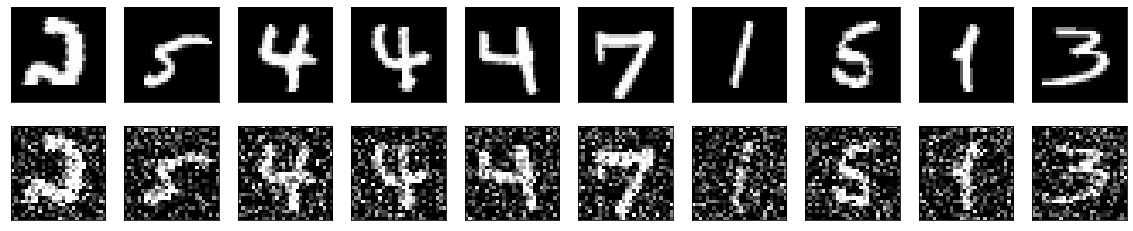

In [2]:
def preprocess(array):
  array = array.astype('float32') / 255.0
  array = np.reshape(array,(len(array), 28, 28, 1))
  return array

def noise(array):

  noise_factor = 0.4
  array = array + noise_factor * np.random.normal(loc= 0.0, scale= 1.0, size = array.shape)

  return np.clip(array, 0.0, 1.0)

def display(array1, array2):

  n = 10
  indices = np.random.randint(len(array1), size = n)

  images1 = array1[indices,:]
  images2 = array2[indices,:]

  plt.figure(figsize= (20,4))
  for i,(image1, image2) in enumerate(zip(images1, images2)):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(image1.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(image2.reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  plt.show()   


(train_data,_), (test_data, _) = mnist.load_data()

train_data= preprocess(train_data)
test_data = preprocess(test_data)

noise_train_data = noise(train_data)
noise_test_data = noise(test_data)

display(train_data, noise_train_data)

# Training a AutoEncoder Model

Defining Model 

In [3]:
inputs = layers.Input(shape = (28, 28, 1))

x = layers.Conv2D(32, 3, activation= 'relu', padding= 'same')(inputs)
x = layers.MaxPooling2D(pool_size=(2,2), padding= 'same')(x)
x = layers.Conv2D(32, 3, activation= 'relu', padding= 'same')(x)
x = layers.MaxPooling2D(pool_size= (2,2), padding= 'same')(x)

x = layers.Conv2DTranspose(32, 3, strides= 2, padding= 'same', activation= 'relu')(x)
x = layers.Conv2DTranspose(32, 3, strides= 2, activation= 'relu', padding= 'same')(x)
x = layers.Conv2D(1, 3, activation= 'sigmoid', padding= 'same')(x)


autoencoder = Model(inputs, x)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        9248  

# Training Model for 50 Epochs and Checking Results 

Fitting the Model

In [4]:
autoencoder.fit(train_data, train_data, batch_size= 128, epochs= 50, validation_data=(test_data, test_data), shuffle= True)

Epoch 1/50
469/469 [==============================] - 37s 9ms/step - loss: 0.2490 - val_loss: 0.0737
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0730 - val_loss: 0.0697
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0699 - val_loss: 0.0683
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0686 - val_loss: 0.0673
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0676 - val_loss: 0.0666
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0670 - val_loss: 0.0661
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0664 - val_loss: 0.0658
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0660 - val_loss: 0.0653
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0657 - val_loss: 0.0651
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0653 - val_loss: 0.064

Making Predictions and comparing predictions with original test data

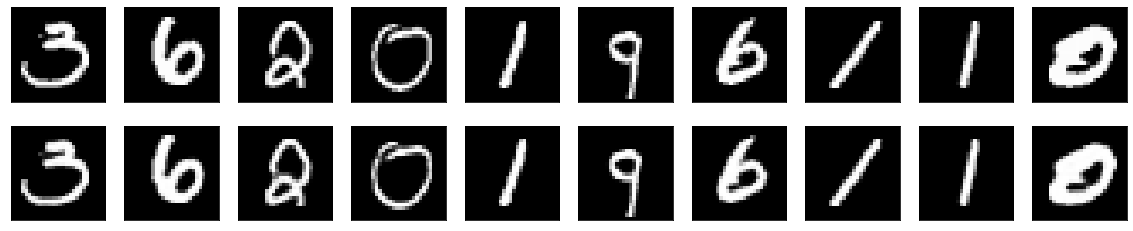

In [5]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

# Training for 100 Epochs and Checking Results

Fitting the Model

In [7]:
autoencoder.fit(noise_train_data, train_data, batch_size = 128, epochs = 100, validation_data = (noise_test_data, test_data), shuffle = True)

Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0990 - val_loss: 0.0926
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0921 - val_loss: 0.0906
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0906 - val_loss: 0.0895
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0896 - val_loss: 0.0889
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0890 - val_loss: 0.0882
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0884 - val_loss: 0.0877
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0880 - val_loss: 0.0874
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0876 - val_loss: 0.0870
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0873 - val_loss: 0.0867
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0870 - val_lo

Making Predictons and comparing with noisy training data

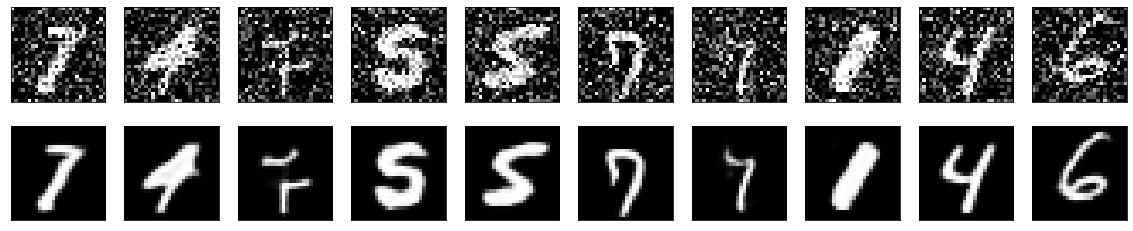

In [8]:
predictions = autoencoder.predict(noise_test_data)
display(noise_test_data, predictions)